# 02. PyTorch Neural Network Classification Exercises
* Notebook coded by Adam Lang as part of the Deep Learning with PyTorch bootcamp with Professor Daniel Bourke.
* Date: 3/12/2024

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# Setup random seed
RANDOM_SEED = 42

In [2]:
print(device)

cpu


## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [3]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


## let's setup hyperparameters for datast
NUM_CLASSES = 4
NUM_FEATURES = 2

# create multi-class dataset
X_moon, y_moon = make_moons(n_samples=1000,
                            noise=0.1) #noise is randomness


In [4]:
## print len of x and y
print(f"Len of X_moon: {len(X_moon)}")
print(f"Len of y_moon: {len(y_moon)}")

Len of X_moon: 1000
Len of y_moon: 1000


In [5]:
## What are first 5 samples of each?
print(f"First 5 samples of X_moon:\n {X_moon[:5]}\n")
print(f"First 5 samples of y_moon:\n {y_moon[:5]}")

First 5 samples of X_moon:
 [[ 0.76683028  0.15977647]
 [ 0.38763339 -0.22215922]
 [ 1.76906855  0.06947836]
 [-0.47354954  0.57886792]
 [ 0.18339942  1.17809901]]

First 5 samples of y_moon:
 [0 1 1 0 0]


In [6]:
# Turn data into a DataFrame
import pandas as pd

moons = pd.DataFrame({"X1": X_moon[:,0],
                      "X2": X_moon[:,1],
                      "Label": y_moon})


# print out head
moons.head(10)

,X1,X2,Label
0,0.766830,0.159776,0
1,0.387633,-0.222159,1
2,1.769069,0.069478,1
3,-0.473550,0.578868,0
4,0.183399,1.178099,0
5,0.255321,-0.117102,1
6,1.812598,-0.127769,1
7,-0.659076,0.752991,0
8,0.999687,0.434056,0
9,0.860707,0.417768,0


In [7]:
## check out value_counts()
moons["Label"].value_counts()

Label
0    500
1    500
Name: count, dtype: int64

In [8]:
# Import lirbaries to Visualize the data on a scatter plot
import matplotlib.pyplot as plt
%matplotlib inline
! pip install cmap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 621.8/621.8 kB 4.5 MB/s eta 0:00:00


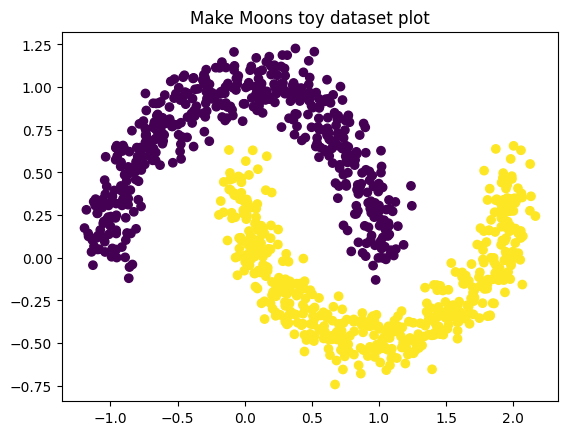

In [9]:
## visualize
## import cm
from matplotlib import cm
plt.scatter(x=X_moon[:,0],
            y=X_moon[:,1],
            c=y_moon)
plt.title("Make Moons toy dataset plot")
plt.show();

In [10]:
# Turn data into tensors of dtype float

# first let's check dtypes
type(X_moon), X_moon.dtype

(numpy.ndarray, dtype('float64'))

We need to convert the `float64` datatype which is the numpy default dtype into a PyTorch Tensor.

In [11]:
# convert from numpy to torch tensor
X = torch.from_numpy(X_moon).type(torch.float)
y = torch.from_numpy(y_moon).type(torch.float)

# let's view the first 5 vals
print(f"First 5 values for X are: {X[:5]}")
print(f"First 5 values for y are: {y[:5]}")


First 5 values for X are: tensor([[ 0.7668,  0.1598],
        [ 0.3876, -0.2222],
        [ 1.7691,  0.0695],
        [-0.4735,  0.5789],
        [ 0.1834,  1.1781]])
First 5 values for y are: tensor([0., 1., 1., 0., 0.])


In [12]:
## check dtypes to verify numpy to torch tensor conversions
X.dtype, y.dtype

(torch.float32, torch.float32)

In [13]:
# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=42)

In [14]:
# let's check the train test split dataset lens
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [15]:
## first lets check the X_train shape
X_train.shape

torch.Size([800, 2])

This means there are 800 samples and 2 classes as we will perform binary classification.

In [16]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu non-linear activation function


  def forward(self, x):
        ## Your code here ##
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

# Instantiate the model
model_0 = MoonModelV0().to(device)
model_0

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

### What loss function to use?
* Simple binary cross-entropy loss (represented by nn.BCELoss in PyTorch) computes BCE loss on the predictions [latex]p[/latex] generated in the range [0, 1].

* However, it is possible to generate more numerically stable variant of binary cross-entropy loss by **combining the Sigmoid and the BCE Loss into one loss function as seen below**:

This version is more numerically stable than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the log-sum-exp trick for numerical stability.
    * `nn.BCEWithLogitsLoss()`
    * docs: https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html

In [17]:
# Setup loss function - combine sigmoid with logits loss
loss_fn = nn.BCEWithLogitsLoss()

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.01)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.


## Going from raw logits => prediction probs => prediction labels
Our model outputs are going to be raw logits.

We can convert these logits into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we convert our model's prediction probabilities to prediction labels by either rounding them or taking the 'argmax()`.

In [18]:
y_test[:5]

tensor([1., 0., 1., 1., 0.])

In [19]:
# What's coming out of our model?

# logits (raw outputs of model)

## Your code here ##
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device)) #pass test data to model
# first 10 preds or logits
print(f"Logits: {y_logits[:10]}")

# Prediction probabilities - use sigmoid activation function
# Sigmoid will put all pred probs between 0 and 1 to match the y_test binary labels
y_pred_probs = torch.sigmoid(y_logits)
print(f"Pred probs: {y_pred_probs[:10]}")

# Prediction labels
## Your code here ##
## transform y_pred_probs => y_preds (labels)
y_preds = torch.argmax(y_pred_probs,dim=1)

## create labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

## check for label equality
#print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
## remove extra dimensions
y_preds.squeeze()

## view the prediction labels
print(f"Pred labels: {y_preds[:5]}")

Logits: tensor([[0.1888],
        [0.2760],
        [0.1761],
        [0.1862],
        [0.2699],
        [0.1909],
        [0.1735],
        [0.2304],
        [0.1993],
        [0.1447]])
Pred probs: tensor([[0.5471],
        [0.5686],
        [0.5439],
        [0.5464],
        [0.5671],
        [0.5476],
        [0.5433],
        [0.5574],
        [0.5497],
        [0.5361]])
Pred labels: tensor([0, 0, 0, 0, 0])


In [20]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 11.6 MB/s eta 0:00:00


In [21]:
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn


## calculate accuracy before training
acc_fn(y_preds, y_test.to(device))

tensor(0.5200)

In [22]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)
## also set cuda seed
torch.cuda.manual_seed(42)

# Setup epochs
epochs = 10000

# Send data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model_0.train()


  # 1. Forward pass (logits output)
  y_logits = model_0(X_train).squeeze()

  # Turn logits into prediction probabilities
  # Turn prediction probabilities into prediction labels
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits => pred probs => pred labels


  # 2. Calculaute the loss
  loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()
  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    test_logits = model_0(X_test).squeeze()
    # Turn the test logits into prediction labels
    test_pred = torch.round(torch.sigmoid(test_logits))


    # 2. Caculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test)

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}% ")


Epoch: 0 | Loss: 0.7017, Acc: 0.50% | Test Loss: 0.7058, Test Acc: 0.48% 
Epoch: 100 | Loss: 0.6768, Acc: 0.50% | Test Loss: 0.6782, Test Acc: 0.48% 
Epoch: 200 | Loss: 0.6559, Acc: 0.87% | Test Loss: 0.6559, Test Acc: 0.87% 
Epoch: 300 | Loss: 0.6305, Acc: 0.87% | Test Loss: 0.6298, Test Acc: 0.83% 
Epoch: 400 | Loss: 0.5964, Acc: 0.87% | Test Loss: 0.5958, Test Acc: 0.83% 
Epoch: 500 | Loss: 0.5532, Acc: 0.86% | Test Loss: 0.5536, Test Acc: 0.82% 
Epoch: 600 | Loss: 0.5030, Acc: 0.86% | Test Loss: 0.5054, Test Acc: 0.81% 
Epoch: 700 | Loss: 0.4514, Acc: 0.85% | Test Loss: 0.4566, Test Acc: 0.82% 
Epoch: 800 | Loss: 0.4048, Acc: 0.85% | Test Loss: 0.4128, Test Acc: 0.81% 
Epoch: 900 | Loss: 0.3674, Acc: 0.85% | Test Loss: 0.3775, Test Acc: 0.82% 
Epoch: 1000 | Loss: 0.3391, Acc: 0.86% | Test Loss: 0.3504, Test Acc: 0.82% 
Epoch: 1100 | Loss: 0.3177, Acc: 0.86% | Test Loss: 0.3291, Test Acc: 0.83% 
Epoch: 1200 | Loss: 0.3013, Acc: 0.87% | Test Loss: 0.3120, Test Acc: 0.83% 
Epoch: 1300

## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [23]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

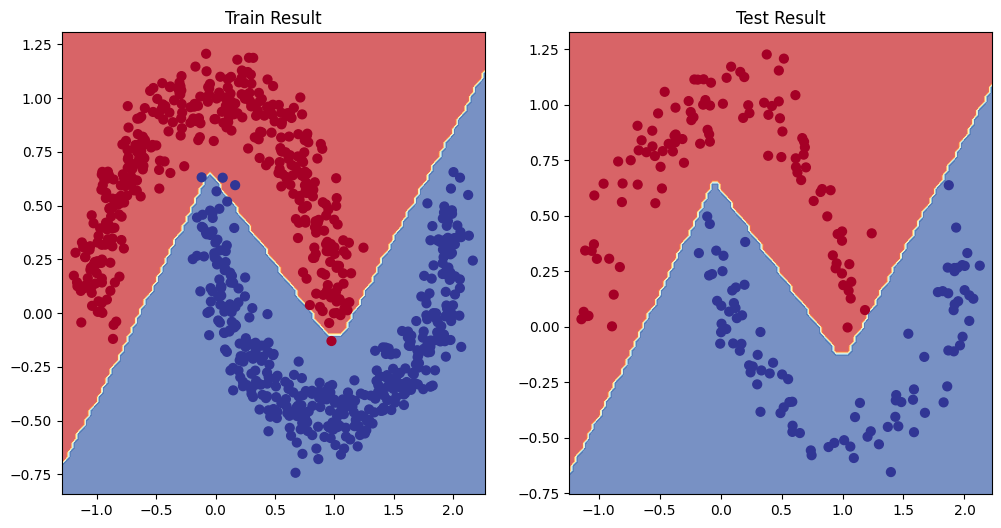

In [24]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train Result")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test Result")
plot_decision_boundary(model_0, X_test, y_test);

**Addendum Summary update**
* Trained model again for 10,000 epochs and achieved accuracy of 1.00 and lowest loss value of 0.0332.
`Epoch: 9900 | Loss: 0.0332, Acc: 1.00% | Test Loss: 0.0271, Test Acc: 1.00% `

**Addendum Summary After training for 10000 epochs to try and achieve 96% accuracy as recommended by exercise directions:**
* We can see that if we train the model long enough with 10,000 epochs we can reach an accuracy of 99% on the train set and 98% on the test set.
`Epoch: 9900 | Loss: 0.0407, Acc: 0.99% | Test Loss: 0.0521, Test Acc: 0.98% `
* We can also see the decision boundaries above are able to learn the non-linear patterns in the data more precisely. So as we can see in what I wrote below, obviously there are other things we could do to try and fine-tune the model before training it for 10,000 epochs, but when in doubt train for longer (within reason obviously GPUs are a concern too).

========================================================================


Initial Summary:
* We can see the non-linear neural network we built above did a decent job with the decision boundary but obviously not 100%.
* We saw the train accuracy was 0.87 and the test accuracy was 0.86.
* The loss did decrease over the 2000 epochs which is good, but it did not reach zero. I actually originally trained the model on 1000 epochs and the loss only was 0.4, so a loss of 0.2 after 2000 epochs is a good sign. However, without making the model too complex by adding more layers, I do think there are some common things we can do that will prevent us from having to train the model for more epochs to achieve better accuracy and lower loss.
    * We could consider changing a few things:
        * 1. Activation function - instead of using SGD use Adam.
        * 2. Change the learning rate (right now its 0.01).
        * 3. Network layers:
            * Consider hyperparameter tuning such as:
                * batch normalization
                * Dropout layers
                * Alternative non-linear functions such as softmax

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [25]:
# Create a straight line tensor
line_tensor = torch.arange(-20, 20, 1, dtype=torch.float32)
line_tensor.dtype

torch.float32

In [26]:
## print line_tensor
line_tensor

tensor([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,
         -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,
          4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
         16.,  17.,  18.,  19.])

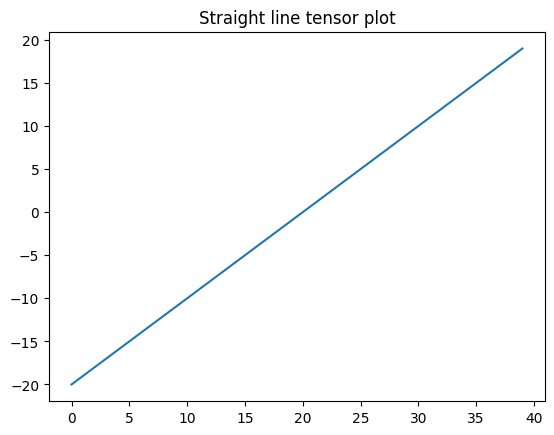

In [27]:
## plot the line_tensor
plt.plot(line_tensor)
plt.title("Straight line tensor plot")
plt.show();

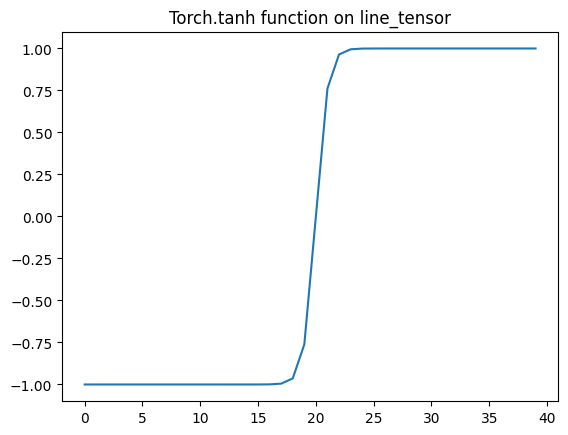

In [28]:
# Test torch.tanh() on the tensor and plot it
plt.plot(torch.tanh(line_tensor))
plt.title("Torch.tanh function on line_tensor")
plt.show();

Applies the Hyperbolic Tangent (Tanh) function element-wise.

Tanh is defined as:

`tanh(𝑥) = (exp(𝑥) - exp(-x)) / (exp(x) + exp(-x))`

We will replicate using python and torch.

In [29]:
# Replicate torch.tanh() and plot it
def tanh(x: torch.Tensor) -> torch.Tensor:
  tanh_x = ((torch.exp(x)) - (torch.exp(-x))) / ((torch.exp(x)) + (torch.exp(-x)))
  return tanh_x

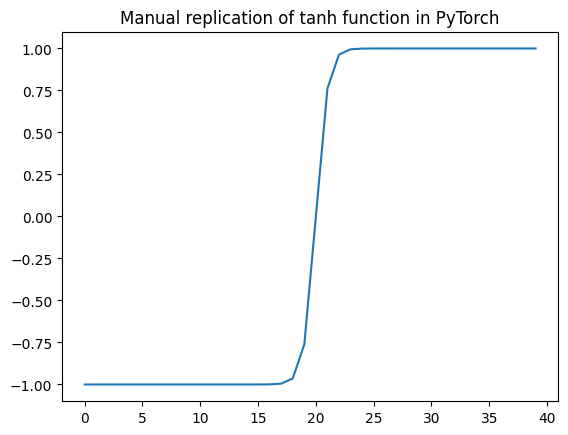

In [30]:
# replicate tanh func
plt.plot(tanh(line_tensor))
plt.title("Manual replication of tanh function in PyTorch")
plt.show();

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

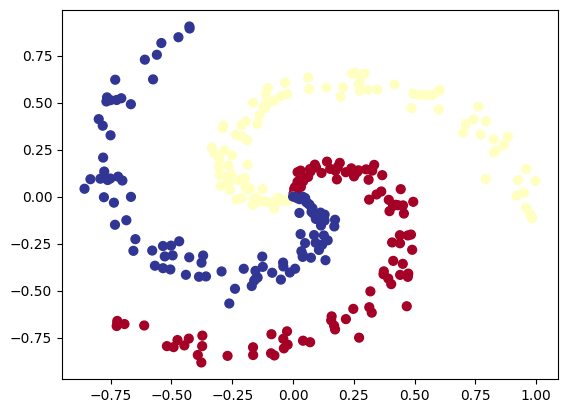

In [31]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

There are 3 classes above hence this is a multi-class classification problem.

In [39]:
##check dtypes above
print(X.dtype,
      y.dtype)

torch.float32 torch.int64


We can see the current `dtypes` above are:
1. `float64`
2. `uint8` -> 8 bit integer

In [38]:
# Turn data into tensors
import torch
#X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.long) # labels need to be of type long



In [51]:
# Create train and test splits
from sklearn.model_selection import train_test_split


X_spiral_train, X_spiral_test, y_spiral_train, y_spiral_test = train_test_split(X,y, test_size=0.2, random_state=42)



In [52]:
## lets look at len of data
len(X_spiral_train), len(X_spiral_test), len(y_spiral_train), len(y_spiral_test)

(240, 60, 240, 60)

In [53]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module
class CS231nModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=6):
    """Initializes a mulit-class classification model

    Args:
      input_features (int): Number of input features for model
      output_features (int): Number of output features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default is 6

      Returns:

      Example:
      """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Softmax(dim=1),
        nn.Linear(in_features=hidden_units, out_features=output_features))

  def forward(self, x):
    return self.linear_layer_stack(x)







# Instantiate model and send it to device
model_1 = CS231nModel(input_features=2,
                      output_features=3,
                      hidden_units=6).to(device)

model_1

CS231nModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=6, bias=True)
    (1): ReLU()
    (2): Linear(in_features=6, out_features=6, bias=True)
    (3): Softmax(dim=1)
    (4): Linear(in_features=6, out_features=3, bias=True)
  )
)

In [54]:
# logits (raw outputs of model)

## Your code here ##
model_1.eval()
with torch.inference_mode():
  y_logits_spiral = model_1(X_spiral_test.to(device)) #pass test data to model
# first 10 preds or logits
print(f"Logits: {y_logits_spiral[:10]}")

# Prediction probabilities - use sigmoid activation function
# Sigmoid will put all pred probs between 0 and 1 to match the y_test binary labels
y_pred_probs_spiral = torch.sigmoid(y_logits_spiral)
print(f"Pred probs: {y_pred_probs_spiral[:10]}")

# Prediction labels
## Your code here ##
## transform y_pred_probs => y_preds (labels)
y_preds_spiral = torch.argmax(y_pred_probs_spiral,dim=1)

## create labels
y_pred_labels_spiral = torch.round(torch.sigmoid(model_1(X_spiral_test.to(device))[:5]))

## check for label equality
#print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
## remove extra dimensions
y_preds_spiral.squeeze()

## view the prediction labels
print(f"Pred labels: {y_preds_spiral[:5]}")

Logits: tensor([[ 0.1502, -0.2361, -0.1930],
        [ 0.1530, -0.2319, -0.1935],
        [ 0.1543, -0.2298, -0.1969],
        [ 0.1508, -0.2352, -0.1937],
        [ 0.1480, -0.2396, -0.1907],
        [ 0.1484, -0.2389, -0.1913],
        [ 0.1471, -0.2399, -0.1936],
        [ 0.1505, -0.2356, -0.1930],
        [ 0.1507, -0.2353, -0.1935],
        [ 0.1514, -0.2343, -0.1964]])
Pred probs: tensor([[0.5375, 0.4413, 0.4519],
        [0.5382, 0.4423, 0.4518],
        [0.5385, 0.4428, 0.4509],
        [0.5376, 0.4415, 0.4517],
        [0.5369, 0.4404, 0.4525],
        [0.5370, 0.4406, 0.4523],
        [0.5367, 0.4403, 0.4518],
        [0.5376, 0.4414, 0.4519],
        [0.5376, 0.4414, 0.4518],
        [0.5378, 0.4417, 0.4511]])
Pred labels: tensor([0, 0, 0, 0, 0])


In [55]:
# Let's calculuate the accuracy for when we fit our model
#!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)

## apply function
acc_fn(y_preds_spiral, y_spiral_test).to(device)

tensor(0.3667)

Note: This accuracy calculation above is on the raw logits before we fit the model

In [56]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.1)

In [58]:
# Build a training loop for the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Loop over data
epochs = 1000

# put data to target device
X_spiral_train, y_spiral_train = X_spiral_train.to(device), y_spiral_train.to(device)
X_spiral_test, y_spiral_test = X_spiral_test.to(device), y_spiral_test.to(device)

  ## Training
for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_spiral_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_spiral_train)
  acc = acc_fn(y_spiral_train, y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_spiral_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    # 2. Calculate loss and acc
    test_loss = loss_fn(test_logits, y_spiral_test)
    test_acc = acc_fn(y_spiral_test, test_preds)

  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test_acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.1172, Acc: 0.32% | Test loss: 1.0927, Test_acc: 0.37%
Epoch: 100 | Loss: 0.1756, Acc: 0.93% | Test loss: 0.0773, Test_acc: 1.00%
Epoch: 200 | Loss: 0.0624, Acc: 0.98% | Test loss: 0.0341, Test_acc: 0.98%
Epoch: 300 | Loss: 0.2164, Acc: 0.93% | Test loss: 0.0811, Test_acc: 0.95%
Epoch: 400 | Loss: 0.0537, Acc: 0.98% | Test loss: 0.0288, Test_acc: 0.98%
Epoch: 500 | Loss: 0.0488, Acc: 0.98% | Test loss: 0.0269, Test_acc: 0.98%
Epoch: 600 | Loss: 0.0452, Acc: 0.99% | Test loss: 0.0250, Test_acc: 0.98%
Epoch: 700 | Loss: 0.0423, Acc: 0.99% | Test loss: 0.0248, Test_acc: 0.98%
Epoch: 800 | Loss: 0.0382, Acc: 0.99% | Test loss: 0.0337, Test_acc: 0.98%
Epoch: 900 | Loss: 0.0336, Acc: 0.99% | Test loss: 0.0333, Test_acc: 0.98%


Summary:
* Instructions were to train for 1000 epochs which I did above.
* Goal was to achieve 95% accuracy, youcan see accuracy was 99% on train set and 98% on test_set.

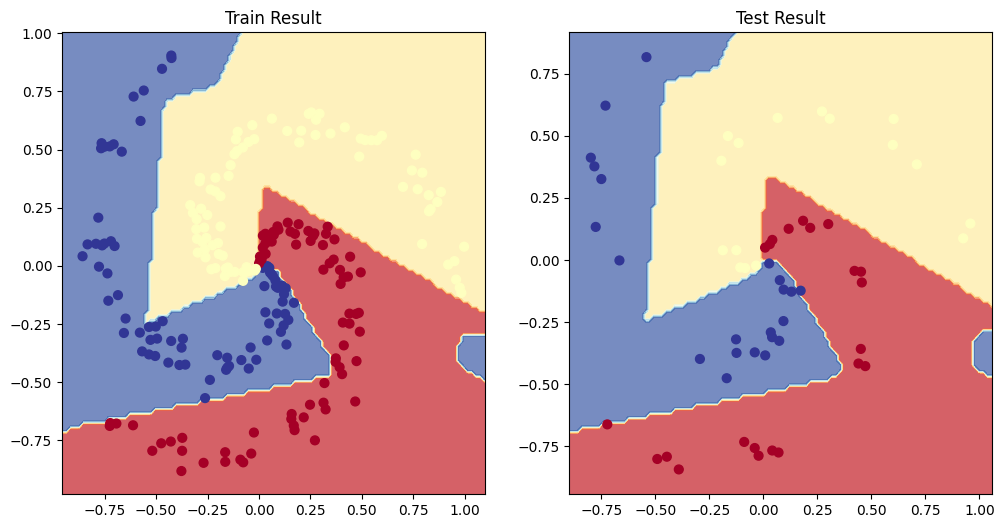

In [59]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train Result")
plot_decision_boundary(model_1, X_spiral_train, y_spiral_train)
plt.subplot(1, 2, 2)
plt.title("Test Result")
plot_decision_boundary(model_1, X_spiral_test, y_spiral_test)
plt.show();


Discussion:
* I was able to train a multi-class classification machine learning model (neural network) in PyTorch.
* I used 2 non-linear layers in the neural network (ReLU and Softmax) and the accuracy was near 99% on train set and 98% on the test set.